In [9]:
from pdfquery import PDFQuery
import os 
import pandas as pd
from utils import (
    convertir_pdf_a_xml
)
from scrap_pdf_AG import (
    check_format,
    get_PESO_BRUTO,
    get_ADUANA_DESTINO,
    get_CRT,
    get_DDT,
    get_DESTINATARIO,
    get_DESTINO,
    get_SEMI,
    get_TRACTOR,
    get_TRANSPORTE_CAMPO_1,
    get_TRANSPORTE_CAMPO_9,
)
from utils import (
    listar_archivos_pdf
)

def test_func(function):
    for i in archivos[:10:2]:
        pdf = PDFQuery(i)
        pdf.load(0)
        print(function(pdf))
        

pd.set_option('display.max_rows', None)


In [4]:
archivos = listar_archivos_pdf('C:/Users/ferna/OneDrive/Desktop/03 MARZO 2025/03 MARZO 2025')


In [5]:
archivos

['C:\\Users\\ferna\\OneDrive\\Desktop\\03 MARZO 2025\\03 MARZO 2025\\25AR060556X.pdf',
 'C:\\Users\\ferna\\OneDrive\\Desktop\\03 MARZO 2025\\03 MARZO 2025\\25AR067108X.pdf',
 'C:\\Users\\ferna\\OneDrive\\Desktop\\03 MARZO 2025\\03 MARZO 2025\\25AR072512D.pdf',
 'C:\\Users\\ferna\\OneDrive\\Desktop\\03 MARZO 2025\\03 MARZO 2025\\25AR072520C.pdf',
 'C:\\Users\\ferna\\OneDrive\\Desktop\\03 MARZO 2025\\03 MARZO 2025\\25AR075003B.pdf',
 'C:\\Users\\ferna\\OneDrive\\Desktop\\03 MARZO 2025\\03 MARZO 2025\\25AR078467S.pdf',
 'C:\\Users\\ferna\\OneDrive\\Desktop\\03 MARZO 2025\\03 MARZO 2025\\25AR078468T.pdf',
 'C:\\Users\\ferna\\OneDrive\\Desktop\\03 MARZO 2025\\03 MARZO 2025\\25AR078476S.pdf',
 'C:\\Users\\ferna\\OneDrive\\Desktop\\03 MARZO 2025\\03 MARZO 2025\\25AR078481Y.pdf',
 'C:\\Users\\ferna\\OneDrive\\Desktop\\03 MARZO 2025\\03 MARZO 2025\\25AR078493R.pdf',
 'C:\\Users\\ferna\\OneDrive\\Desktop\\03 MARZO 2025\\03 MARZO 2025\\25AR078498W.pdf',
 'C:\\Users\\ferna\\OneDrive\\Desktop\\03 M

In [5]:

archivo = archivos[20]

In [25]:
convertir_pdf_a_xml(archivo, output_path='data/archivo.xml')

'data/archivo.xml'

In [14]:
for archivo in archivos:
    pdf = PDFQuery(archivo)
    pdf.load(0)

    print(get_TRANSPORTE_CAMPO_99(pdf))


NameError: name 'get_TRANSPORTE_CAMPO_99' is not defined

In [71]:


import re
import fitz
import pandas as pd

def get_TRANSPORTE_CAMPO_9_1(archivos: list[str]):
    """_summary_

    Args:
        archivo (str): _description_

    Returns:
        _type_: _description_
    """
    
    data = []
    for archivo in archivos:
    
        pdf = fitz.open(archivo).load_page(0)
        # Load the page content as text
        page_text = pdf.get_text("text")

        texto_antes = 'CAMINH?O ORIGINAL : Nome e endereco do proprietario\n9\n'
        texto_despues = 'CAMION SUBSTITUTO : Nombre y domicilio del propietario'

        pattern = re.escape(texto_antes) + r"(.*?)" + re.escape(texto_despues)
        
        matches = re.findall(pattern, page_text, re.DOTALL)

        data.append(matches[0].split('- ')[0].strip()) if matches else None
    
    return data

get_TRANSPORTE_CAMPO_9_1(archivos)


['LOGI?STICA INTERNACIONAL F B SPA',
 'CORTEZ LEONARDO MARIANO',
 'EXPRESO EL AGUILUCHO S.A.',
 'EXPRESO EL AGUILUCHO S.A.',
 'MOYA Y COMPANIA LTDA',
 'TRANSPORTE MC CORMACK',
 'PE?A JAIME OSCAR OMAR',
 'TRANS PACHIS S.R.L.',
 'HUGO WALTER OLAVERRY RIVERO S.A',
 'HUGO WALTER OLAVERRY RIVERO S.A',
 'HUGO WALTER OLAVERRY RIVERO S.A',
 'VARONA RAMIRO HERNAN',
 'CARLOS E. RIFFEL',
 'HUGO WALTER OLAVERRY RIVERO S.A',
 'OTERO  ROLANDO ARIEL',
 'TIEMPO NUEVO SRL',
 'EXPRESO EL AGUILUCHO S.A.',
 'EXPRESO EL AGUILUCHO S.A.',
 'EXPRESO EL AGUILUCHO S.A.',
 'EXPRESO EL AGUILUCHO S.A.',
 'EXPRESO EL AGUILUCHO S.A.',
 'EXPRESO EL AGUILUCHO S.A.',
 'EMPRESA DE TTES. DON PEDRO S.R.L.',
 'EMPRESA DE TTES. DON PEDRO S.R.L.',
 'EMPRESA DE TTES. DON PEDRO S.R.L.',
 'EMPRESA DE TTES. DON PEDRO S.R.L.',
 'EMPRESA DE TTES. DON PEDRO S.R.L.',
 'EMPRESA DE TTES. DON PEDRO S.R.L.',
 'EMPRESA DE TTES. DON PEDRO S.R.L.',
 'CORIA EDGARDO JOSE',
 'PEREZ CARLOS ANDRES',
 'LOGISTICA TRANSLON SAS',
 'PAVEZ RUBEN ARIE

In [13]:
def get_PRECINTO(pdf: PDFQuery):
    
    text  =  pdf.pq('LTTextLineHorizontal:contains("37 Numero de los precintos")').next().text()
    return text

In [14]:
for archivo in archivos:
    pdf = PDFQuery(archivo)
    pdf.load(0)
    print(get_PRECINTO(pdf))

JF49888
JI06242
JF49880
JF49881
JF49889
JF51324/25
JF51326


c:\Users\ferna\AppData\Local\Programs\Python\Python313\Lib\site-packages\pdfquery\pdfquery.py:475: SyntaxWarning: invalid escape sequence '\W'
  k = re.sub('\W', '_', k)


KeyboardInterrupt: 

<Axes: ylabel='KILOS BRUTOS'>

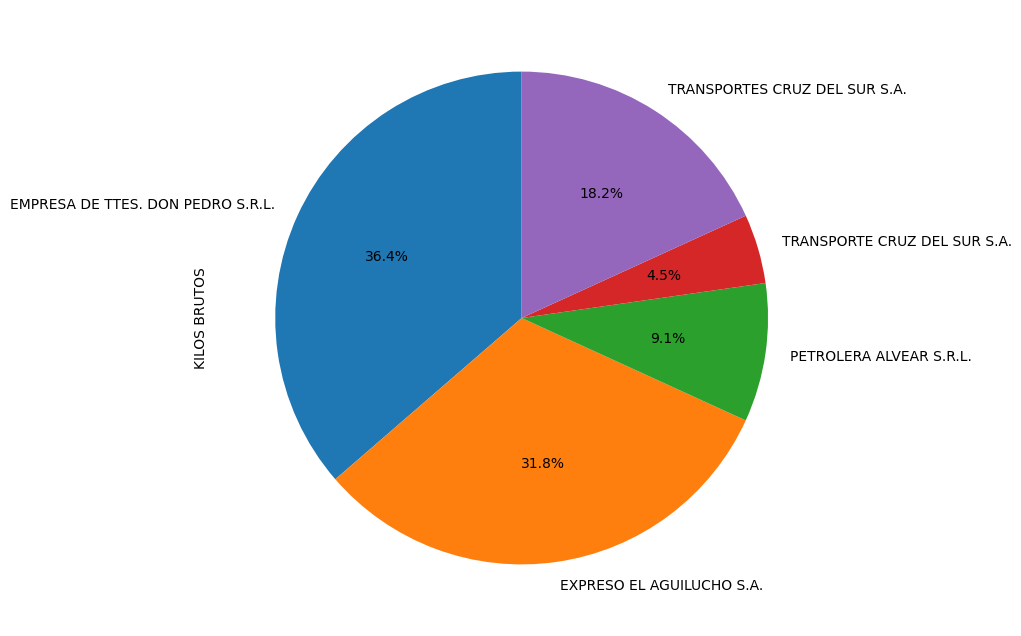

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('data/agtest1.xlsx',sheet_name='Sheet1', header=0, engine='openpyxl')
df

# hacer un grafico de torta con TRANSPORTE CAMPO 1 Y QUE SUME POR CDA UNO CANTIDAD BULTOS, ponemelo en cantidad
df.groupby('TRANSPORTE CAMPO 1')['KILOS BRUTOS'].sum().plot.pie(autopct='%1.1f%%', startangle=90, figsize=(8, 8))



In [2]:
def get_EXPORTADOR(pdf: PDFQuery):
    text  =  pdf.pq('LTTextLineHorizontal:contains("/ Remetente")').next().text()
    return text

In [10]:
data = []
for archivo in archivos:
    pdf = PDFQuery(archivo)
    pdf.load(0)
    data.append(get_EXPORTADOR(pdf))

df = pd.DataFrame(data)
df[0] = df[0].str.split('\n').str[0]
df

,0
0,PBBPOLISUR SOCIEDAD DE RESPONS
1,PBBPOLISUR SOCIEDAD DE RESPONS
2,PBBPOLISUR SOCIEDAD DE RESPONS
3,PBBPOLISUR SOCIEDAD DE RESPONS
4,PBBPOLISUR SOCIEDAD DE RESPONS
5,VITERRA ARGENTINA S.A.
6,VITERRA ARGENTINA S.A.
7,VITERRA ARGENTINA S.A.
8,VITERRA ARGENTINA S.A.
9,VITERRA ARGENTINA S.A.
